In [27]:
import requests
import gzip
import shutil
import pandas as pd
import numpy as np
import time
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

## Data Upload

### Tokyo Q3 Data Upload

In [5]:
url = "https://github.com/HDuo1129/Data-Analysis-3/raw/main/Assignment%202/Dataset/Tokyo/2024%20Q3/listings.csv.gz"
file_path = "listings.csv.gz"

response = requests.get(url)
with open(file_path, "wb") as f:
    f.write(response.content)

with gzip.open("listings.csv.gz", "rb") as f_in:
    with open("listings.csv", "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

In [7]:
Tokyo_Q3 = pd.read_csv("listings.csv.gz", compression="gzip")
print(Tokyo_Q3.head())

        id                           listing_url       scrape_id last_scraped  \
0   197677   https://www.airbnb.com/rooms/197677  20240927024131   2024-09-27   
1   776070   https://www.airbnb.com/rooms/776070  20240927024131   2024-09-27   
2   905944   https://www.airbnb.com/rooms/905944  20240927024131   2024-09-27   
3  1016831  https://www.airbnb.com/rooms/1016831  20240927024131   2024-09-27   
4  1196177  https://www.airbnb.com/rooms/1196177  20240927024131   2024-09-27   

        source                                               name  \
0  city scrape                          Oshiage Holiday Apartment   
1  city scrape                             Kero-kero house room 1   
2  city scrape  4F Spacious Apartment in Shinjuku / Shibuya Tokyo   
3  city scrape         5 mins Shibuya Cat modern sunny  Shimokita   
4  city scrape        Stay with host Cozy private room Senju area   

                                         description  \
0                                         

### Tokyo Q4 Data Upload

In [42]:
url = "https://github.com/HDuo1129/Data-Analysis-3/raw/main/Assignment%202/Dataset/Tokyo/2024%20Q4/listings.csv.gz"
file_path = "listings.csv.gz"

response = requests.get(url)
with open(file_path, "wb") as f:
    f.write(response.content)

with gzip.open("listings.csv.gz", "rb") as f_in:
    with open("listings.csv", "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

In [44]:
Tokyo_Q4 = pd.read_csv("listings.csv.gz", compression="gzip")
print(Tokyo_Q4.head())

        id                           listing_url       scrape_id last_scraped  \
0   197677   https://www.airbnb.com/rooms/197677  20241230011552   2024-12-30   
1   776070   https://www.airbnb.com/rooms/776070  20241230011552   2024-12-30   
2   905944   https://www.airbnb.com/rooms/905944  20241230011552   2024-12-30   
3  1016831  https://www.airbnb.com/rooms/1016831  20241230011552   2024-12-30   
4  1196177  https://www.airbnb.com/rooms/1196177  20241230011552   2024-12-30   

        source                                               name  \
0  city scrape                          Oshiage Holiday Apartment   
1  city scrape                             Kero-kero house room 1   
2  city scrape  4F Spacious Apartment in Shinjuku / Shibuya Tokyo   
3  city scrape         5 mins Shibuya Cat modern sunny  Shimokita   
4  city scrape   Homestay at Host's House -  Senju-Ohashi Station   

                                         description  \
0                                         

### Bangkok Q3 Data Upload

In [46]:
url = "https://github.com/HDuo1129/Data-Analysis-3/raw/main/Assignment%202/Dataset/Bangkok/2024%20Q3/listings.csv.gz"
file_path = "listings.csv.gz"

response = requests.get(url)
with open(file_path, "wb") as f:
    f.write(response.content)

with gzip.open("listings.csv.gz", "rb") as f_in:
    with open("listings.csv", "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

In [48]:
Bangkok_Q3 = pd.read_csv("listings.csv.gz", compression="gzip")
print(Bangkok_Q3.head())

      id                         listing_url       scrape_id last_scraped  \
0  27934  https://www.airbnb.com/rooms/27934  20240925020907   2024-09-25   
1  27979  https://www.airbnb.com/rooms/27979  20240925020907   2024-09-25   
2  28745  https://www.airbnb.com/rooms/28745  20240925020907   2024-09-25   
3  35780  https://www.airbnb.com/rooms/35780  20240925020907   2024-09-25   
4  48736  https://www.airbnb.com/rooms/48736  20240925020907   2024-09-25   

            source                                            name  \
0      city scrape                 Nice room with superb city view   
1  previous scrape                  Easy going landlord,easy place   
2  previous scrape               modern-style apartment in Bangkok   
3      city scrape  Spacious one bedroom at The Kris Condo Bldg. 3   
4      city scrape                 Condo with Chaopraya River View   

                                         description  \
0  Our cool and comfortable one bedroom apartment...   
1   

## Data Cleaning

### Tokyo Q3 Data Cleaning

In [9]:
columns_to_drop = [
    "scrape_id", "source", "neighbourhood_group_cleansed", "calendar_updated", "listing_url", "picture_url", 
    "host_url", "host_thumbnail_url", "host_picture_url", "host_neighbourhood", "neighbourhood", "calendar_last_scraped",
    "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", 
    "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "calculated_host_listings_count_entire_homes", 
    "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "host_id"]
Tokyo_Q3_cleaned = Tokyo_Q3.drop(columns=columns_to_drop)

fillna_dict = {
    "description": "",
    "neighborhood_overview": "",
    "host_about": "",
    "host_location": "Unknown",
    "host_response_time": "Unknown",
    "host_response_rate": "0%",
    "host_acceptance_rate": "0%",
    "bathrooms": Tokyo_Q3_cleaned["bathrooms"].median(),
    "bedrooms": Tokyo_Q3_cleaned["bedrooms"].median(),
    "beds": Tokyo_Q3_cleaned["beds"].median(),
    "review_scores_rating": 0,
    "review_scores_accuracy": 0,
    "review_scores_cleanliness": 0,
    "review_scores_checkin": 0,
    "review_scores_communication": 0,
    "review_scores_location": 0,
    "review_scores_value": 0,
    "reviews_per_month": 0}
Tokyo_Q3_cleaned.fillna(fillna_dict, inplace=True)

In [11]:
# Price Check
Tokyo_Q3_cleaned["price"] = (
    Tokyo_Q3_cleaned["price"]
    .astype(str)
    .str.replace("$", "")
    .str.replace(",", "")
    .astype(float))

# Rate Check
Tokyo_Q3_cleaned["host_response_rate"] = (
    Tokyo_Q3_cleaned["host_response_rate"]
    .str.replace("%", "")
    .astype(float))
Tokyo_Q3_cleaned["host_acceptance_rate"] = (
    Tokyo_Q3_cleaned["host_acceptance_rate"]
    .str.replace("%", "")
    .astype(float))

# Date Check
date_cols = ["host_since", "first_review", "last_review"]
for col in date_cols:
    Tokyo_Q3_cleaned[col] = pd.to_datetime(Tokyo_Q3_cleaned[col], errors="coerce")

# TF Result Check
bool_cols = ["instant_bookable", "host_is_superhost", "host_identity_verified"]
for col in bool_cols:
    Tokyo_Q3_cleaned[col] = Tokyo_Q3_cleaned[col].map({"t": True, "f": False})

# Calculate Landlord Experience
Tokyo_Q3_cleaned["host_experience"] = 2024 - Tokyo_Q3_cleaned["host_since"].dt.year

# Facility Pick-Up
important_amenities = ["Wifi", "Kitchen", "Washer", "Air conditioning", "Heating", "TV", "Elevator"]
for amenity in important_amenities:
    Tokyo_Q3_cleaned[f"has_{amenity.lower().replace(' ', '_')}"] = Tokyo_Q3_cleaned["amenities"].apply(lambda x: amenity in x)

# Calculate Distance from Centre
tokyo_center = (35.682839, 139.759455)
Tokyo_Q3_cleaned["distance_from_center"] = Tokyo_Q3_cleaned.apply(lambda row: geodesic((row["latitude"], row["longitude"]), tokyo_center).km, axis=1)

In [13]:
columns_to_drop_final = ["bathrooms_text", "host_about", "host_location", "host_verifications",
                         "host_has_profile_pic", "license", "amenities", "latitude", "longitude"]
Tokyo_Q3_cleaned = Tokyo_Q3_cleaned.drop(columns=columns_to_drop_final)
rename_dict = {
    "review_scores_communication": "review_communication_score",
    "review_scores_location": "review_location_score",
    "review_scores_value": "review_value_score",
    "host_total_listings_count": "total_listings_by_host"}
Tokyo_Q3_cleaned.rename(columns=rename_dict, inplace=True)

In [15]:
print(Tokyo_Q3_cleaned.head())

        id last_scraped                                               name  \
0   197677   2024-09-27                          Oshiage Holiday Apartment   
1   776070   2024-09-27                             Kero-kero house room 1   
2   905944   2024-09-27  4F Spacious Apartment in Shinjuku / Shibuya Tokyo   
3  1016831   2024-09-27         5 mins Shibuya Cat modern sunny  Shimokita   
4  1196177   2024-09-27        Stay with host Cozy private room Senju area   

                                         description  \
0                                                      
1  We have been in airbnb since 2011 and it has g...   
2  NEWLY RENOVATED property entirely for you & yo...   
3  Hi there, I am Wakana and I live with my two f...   
4  Ｓtay with host.We can help your travel.<br />B...   

                               neighborhood_overview            host_name  \
0                                                         Yoshimi & Marek   
1  We love Nishinippori because is neare

### Tokyo Q4 Data Cleaning

### Bangkok Q3 Data Cleaning

## Data Analysis

### Tokyo Q3 Data Analysis

In [17]:
numeric_features = Tokyo_Q3_cleaned.select_dtypes(include=[np.number]).columns.tolist()
features = [col for col in numeric_features if col not in ["id", "price"]]
Tokyo_Q3_cleaned[features] = Tokyo_Q3_cleaned[features].astype(float)
scaler = StandardScaler()
Tokyo_Q3_cleaned[features] = scaler.fit_transform(Tokyo_Q3_cleaned[features])

In [19]:
X = Tokyo_Q3_cleaned[features]
y = Tokyo_Q3_cleaned["price"].fillna(Tokyo_Q3_cleaned["price"].median())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [46]:
models = {"OLS": LinearRegression(),
          "LASSO": Lasso(alpha=0.01, max_iter=5000),
          "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
          "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42),
          "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)}

In [33]:
def get_rmse(actual, pred):
    return np.sqrt(mean_squared_error(actual, pred))

def get_bic(model, X, y):
    n = len(y)
    k = X.shape[1]
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return n * np.log(mse) + k * np.log(n)

def cross_val_rmse(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
    return np.sqrt(-mse_scores.mean())

In [54]:
def evaluate_models(models, X_train, X_test, y_train, y_test, X, y):
    results = []
    fitted_models = {} 
    for name, model in models.items():
        
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time

        y_pred = model.predict(X_test)
        rmse = get_rmse(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        bic = get_bic(model, X_test, y_test)
        cv_rmse = cross_val_rmse(model, X, y)
        cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
        cv_rmse = np.sqrt(-cv_scores.mean())

        results.append([name, rmse, cv_rmse, bic, r2, training_time])
        fitted_models[name] = model

    columns = ["Model", "RMSE", "CV-RMSE", "BIC", "R2 Score", "Training Time"]
    results_df = pd.DataFrame(results, columns=columns)
    return results_df.sort_values(by="RMSE")

results_df = evaluate_models(models, X_train, X_test, y_train, y_test, X, y)
print("Horserace Table: Model Performance Comparison")
print(results_df)

Horserace Table: Model Performance Comparison
               Model          RMSE       CV-RMSE           BIC  R2 Score  \
1              LASSO  17269.011201  43396.262994  73366.401555  0.203845   
0                OLS  17269.023107  43396.268022  73366.406723  0.203843   
3  Gradient Boosting  17278.554215  53213.645374  73370.542769  0.202964   
4            XGBoost  18251.068001  71510.980774  73781.005043  0.110718   
2      Random Forest  18739.288818  54013.354914  73978.889902  0.062505   

   Training Time  
1       0.578712  
0       0.016475  
3       7.643493  
4       0.352491  
2      12.506110  


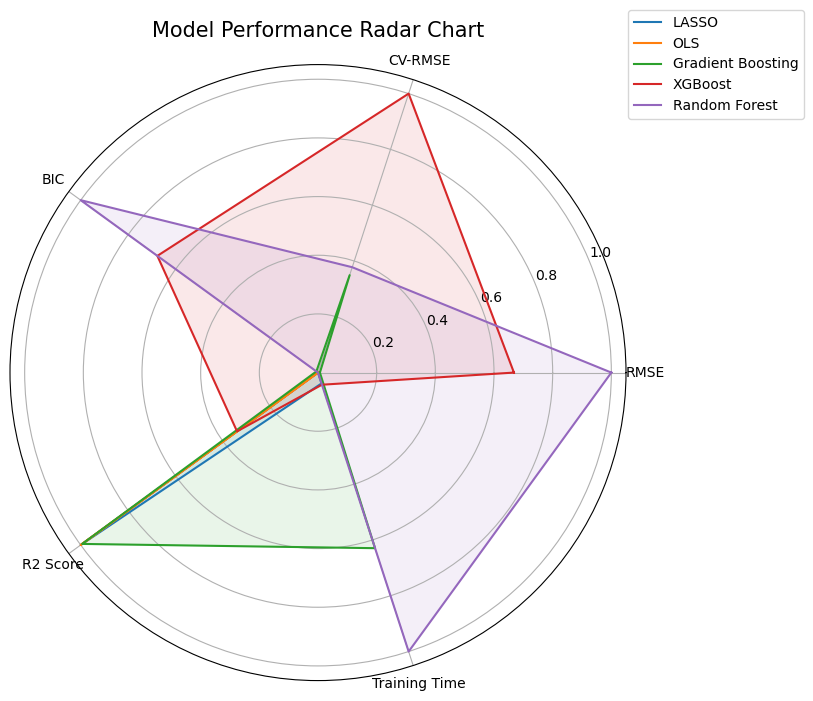

In [41]:
# Radargram Visualisation Results
labels = ["RMSE", "CV-RMSE", "BIC", "R2 Score", "Training Time"]
num_vars = len(labels)

df_plot = results_df.copy()
df_plot.set_index("Model", inplace=True)
df_norm = (df_plot - df_plot.min()) / (df_plot.max() - df_plot.min())

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for model_name, row in df_norm.iterrows():
    values = row[labels].tolist()
    values += values[:1]
    ax.plot(angles, values, label=model_name)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Model Performance Radar Chart", size=15, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

Random Forest Top 10 Features
                           Feature  Importance
4                     accommodates    0.168018
26                 host_experience    0.165834
2              host_listings_count    0.114760
24  calculated_host_listings_count    0.096282
9                   maximum_nights    0.081226
27            distance_from_center    0.075902
10                 availability_30    0.062717
12                 availability_90    0.039011
13                availability_365    0.033845
1             host_acceptance_rate    0.033408

XGBoost Top 10 Features
               Feature  Importance
26     host_experience    0.332156
0   host_response_rate    0.262361
9       maximum_nights    0.075291
8       minimum_nights    0.064076
5            bathrooms    0.026761
14   number_of_reviews    0.026740
4         accommodates    0.023478
11     availability_60    0.019827
13    availability_365    0.018024
7                 beds    0.018019


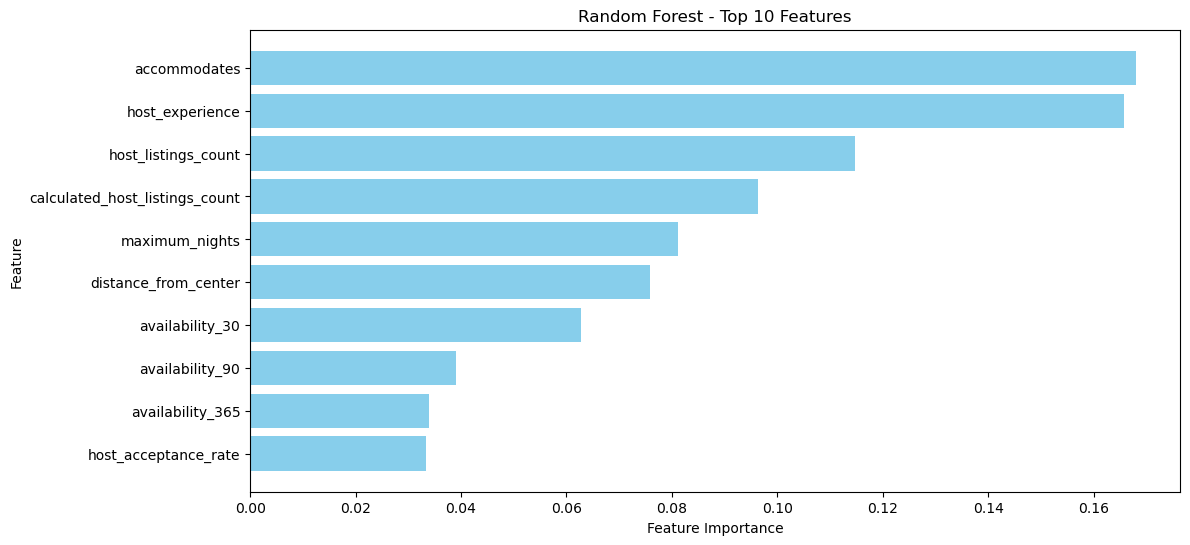

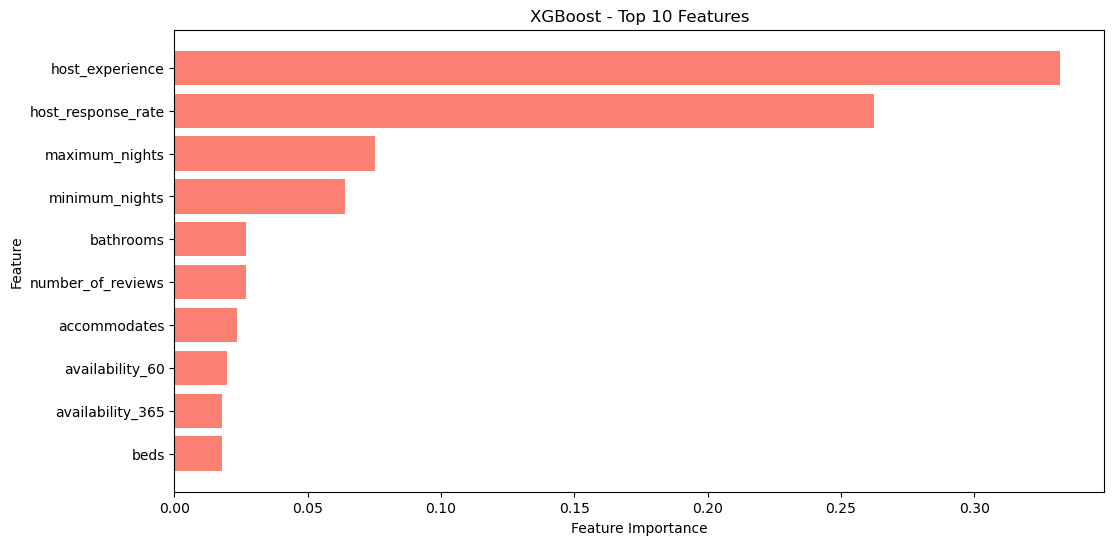

In [63]:
rf_model = models["Gradient Boosting"]
xgb_model = models["XGBoost"]

rf_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
xgb_importance = pd.DataFrame({"Feature": X.columns, "Importance": xgb_model.feature_importances_})

# Choose top 10
rf_top10 = rf_importance.sort_values(by="Importance", ascending=False).head(10)
xgb_top10 = xgb_importance.sort_values(by="Importance", ascending=False).head(10)

print("Random Forest Top 10 Features")
print(rf_top10)
print("\nXGBoost Top 10 Features")
print(xgb_top10)

plt.figure(figsize=(12, 6))
plt.barh(rf_top10["Feature"], rf_top10["Importance"], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest - Top 10 Features")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(xgb_top10["Feature"], xgb_top10["Importance"], color='salmon')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost - Top 10 Features")
plt.gca().invert_yaxis()
plt.show()